<a href="https://colab.research.google.com/github/Amr0093/Amr0093/blob/main/Classification_end_to_end_project(Amr).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing



In [ ]:
df = pd.read_csv("/content/sample_data/Mall_Customers.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.shape

(200, 5)

In [ ]:
df.drop('CustomerID', axis=1, inplace=True)

In [ ]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
True_labels = df.Genre
True_labels

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Genre, Length: 200, dtype: object

In [ ]:
True_labels.unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
le = preprocessing.LabelEncoder()
True_encoded = le.fit_transform(True_labels)
#le.inverse_transform(True_labels)

In [ ]:
df.drop('Genre', axis=1, inplace=True)

In [ ]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [ ]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# MODEL TRAINING

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df,True_labels,test_size=0.2,random_state=101)

In [ ]:
y_train

16     Female
186    Female
144      Male
121    Female
80       Male
        ...  
63     Female
70       Male
81       Male
11     Female
95       Male
Name: Genre, Length: 160, dtype: object

In [ ]:
kmeans_kwargs = {
    "init":'k-means++',
    "n_init": 10,
    "random_state": 42,
}


In [ ]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs).fit(x_train)
    sse.append(kmeans.inertia_)

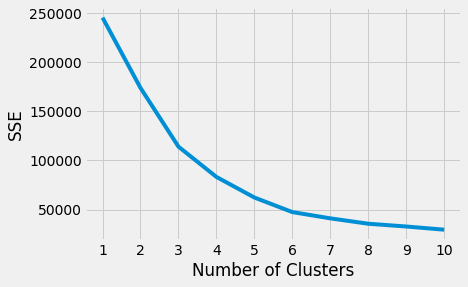

In [ ]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

the K that will be used will be K=3 or K=4

In [ ]:
k_list = [2,3,4,5,6,7]
highest_k = []

In [ ]:
for K in k_list:
  print(f'\n #####################  k={K} #######################\n')
  kmeans = KMeans(n_clusters=K, **kmeans_kwargs).fit(x_train)
  train_labels  = kmeans.labels_
  train_labels
  print(f'Trained label{train_labels[:5]},\noriginal label\n{ y_train[:5]}')
  print(f'Estimated number of clusters:{K}')
  #print("Estimated number of noise points: %d" % n_noise_)
  print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_train, train_labels))
  print("Completeness: %0.3f" % metrics.completeness_score(y_train, train_labels))
  print("V-measure: %0.3f" % metrics.v_measure_score(y_train, train_labels))
  print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y_train, train_labels))
  print(
      "Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y_train, train_labels)
  )
  print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(x_train, train_labels))
  highest_k.append([K,metrics.silhouette_score(x_train, train_labels)])


 #####################  k=2 #######################

Trained label[0 1 1 1 0],
original label
16     Female
186    Female
144      Male
121    Female
80       Male
Name: Genre, dtype: object
Estimated number of clusters:2
Homogeneity: 0.006
Completeness: 0.006
V-measure: 0.006
Adjusted Rand Index: -0.001
Adjusted Mutual Information: 0.001
Silhouette Coefficient: 0.249

 #####################  k=3 #######################

Trained label[2 1 1 2 2],
original label
16     Female
186    Female
144      Male
121    Female
80       Male
Name: Genre, dtype: object
Estimated number of clusters:3
Homogeneity: 0.010
Completeness: 0.008
V-measure: 0.009
Adjusted Rand Index: 0.010
Adjusted Mutual Information: 0.001
Silhouette Coefficient: 0.386

 #####################  k=4 #######################

Trained label[1 2 2 1 1],
original label
16     Female
186    Female
144      Male
121    Female
80       Male
Name: Genre, dtype: object
Estimated number of clusters:4
Homogeneity: 0.011
Completeness: 0

In [ ]:
print(f'K-value  Silhouette Coefficient: ')
print(f'{highest_k}')

K-value  Silhouette Coefficient: 
[[2, 0.24927847845474355], [3, 0.3861381716530209], [4, 0.40811776270686523], [5, 0.4371137759844047], [6, 0.4499156427419499], [7, 0.4412550229880033]]


In [ ]:
kmeans = KMeans(n_clusters=6, **kmeans_kwargs).fit(x_train)
train_labels  = kmeans.labels_
train_labels
print(f'Trained label{train_labels[:5]},\noriginal label\n{ y_train[:5]}')
print(f'Estimated number of clusters:{K}')
#print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_train, train_labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_train, train_labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_train, train_labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y_train, train_labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(y_train, train_labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(x_train, train_labels))

Trained label[2 5 5 0 1],
original label
16     Female
186    Female
144      Male
121    Female
80       Male
Name: Genre, dtype: object
Estimated number of clusters:7
Homogeneity: 0.024
Completeness: 0.009
V-measure: 0.013
Adjusted Rand Index: 0.002
Adjusted Mutual Information: 0.000
Silhouette Coefficient: 0.450


In [ ]:
test_labels = kmeans.predict(x_test)

In [ ]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(x_test, test_labels))

Silhouette Coefficient: 0.473


### DB SCAN

In [ ]:
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(x_train)
labels = db.labels_

In [ ]:
test_predict = db.fit_predict(x_test)

In [ ]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [ ]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


In [ ]:
print(f'Estimated number of clusters:{n_clusters_}')
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(x_train,labels ))

Estimated number of clusters:0
Estimated number of noise points: 160


ValueError: ignored

In [ ]:
print("Completeness: %0.3f" % metrics.completeness_score(y_train, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_train, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y_train, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(y_train, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(x_train, labels))

Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000


ValueError: ignored

In [ ]:
x_train.shape

(160, 3)

In [ ]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [ ]:
# # this line used to make a numbering for the labels 
# unique_labels = set(labels)

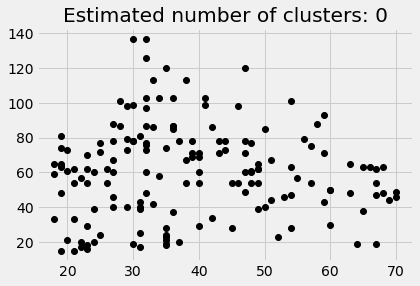

In [ ]:
# #############################################################################
# Plot result


# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = x_train[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=14 )

    xy = x_train[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

Decision tree and randomized search cannot be used as, they are used in classification, only in case there are a label presented, otherwise you can only use the Kmeans, DPscan or gaussean mixture

## Gaussean mixture

In [ ]:
gm = GaussianMixture(n_components=2, random_state=0).fit(x_train)

In [ ]:
gm_predict = gm.predict(x_test)

In [ ]:
#print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(gm_predict, y_test))

Homogeneity: 0.038


In [ ]:
print("Completeness: %0.3f" % metrics.completeness_score(gm_predict, y_test))
print("V-measure: %0.3f" % metrics.v_measure_score(gm_predict, y_test))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(gm_predict, y_test))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(gm_predict, y_test)
)
# print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(x_train, x_test))

Completeness: 0.038
V-measure: 0.038
Adjusted Rand Index: 0.038
Adjusted Mutual Information: 0.019
